In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
savefigs = True

### Read-in data

In [3]:
df = pd.read_excel('RAW-DATA_machine-defects.xlsx')
df.shape

(26, 6)

In [4]:
df.head()

,Machines,Defects,Maintenance,Technicians,Age,Tool
0,1,860,26,5,6.0,18.3
1,2,890,27,2,7.0,10.2
2,3,852,20,3,5.2,14.7
3,4,889,28,3,4.3,13.1
4,5,1037,25,4,13.5,7.6


**Reorder columns to position output variable first (only for readability):**

In [5]:
columns = ['Defects', 'Machines', 'Maintenance', 'Technicians', 'Age', 'Tool']
df = df.reindex(columns=columns)

In [6]:
df.describe()

,Defects,Machines,Maintenance,Technicians,Age,Tool
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,1006.961538,13.500000,22.615385,4.115385,9.738462,11.038462
std,197.388851,7.648529,3.742480,1.142871,3.810520,4.484558
min,724.000000,1.000000,15.000000,2.000000,4.300000,4.000000
25%,867.250000,7.250000,20.000000,3.000000,6.700000,7.900000
50%,974.500000,13.500000,23.500000,4.000000,8.500000,10.000000
75%,1104.000000,19.750000,25.750000,5.000000,13.575000,15.450000
max,1439.000000,26.000000,28.000000,6.000000,17.100000,18.500000


# 1. Distribution of each given feature: Histograms

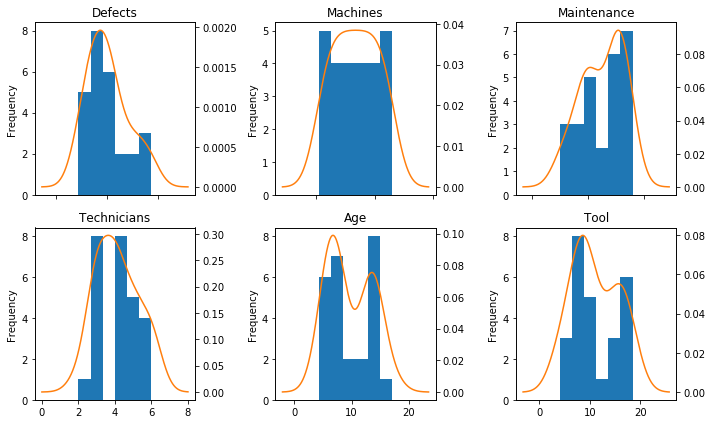

In [7]:
fig, ax_k = plt.subplots(2, 3, figsize=(10, 6))
i = 0
for column in df:
    ax = ax_k[i//3, i%3]
    df[column].hist(ax=ax, bins='auto', color='C0')
    df[column].plot.kde(ax=ax, secondary_y=True, color='C1')
    ax.set(title=column, ylabel='Frequency')
    i += 1
plt.tight_layout()
plt.show()

fig.savefig(f'figs/histograms.png', dpi=800) if savefigs else plt.show()

## Conclusions from feature distributions
The above distribution plots include both a histogram and Gaussian Kernel Density Estimate (KDE) plot for each feature (variable) in the dataset. A KDE (as the name implies) estimates the variable's probability density function—the continuous equivalent to a the inherently discrete histogram. 

Due to the limited sample size (26) the KDEs have very low peak densities (for context, the area under the KDE curve is 1), this means that the KDEs do *not* provide particularly reliable pictures of the population's distribusion.

*(reading from left-to-right, then top-to-bottom)*

1. **Defects:** Unimodal distribution, right skew due to an higher number of machines in the highest defect bin than would be expeted of a normal/Gaussian distribution. 
2. **Machines:** Machine number is a unique identifier for each machine, therefore the histogram of machine number frequency contains *no useful information* since each idenetifier is unique and has no inherent meaning. 
3. **Maintenance:** Potentially bimodal distribution, but centre dip could be a result of binning. Too few data points to be sure.
4. **Technicians:** Again, potentially bimodal distribution, but centre zero could be a result of binning. Too few data points to be sure (may be pseudo-normal).
5. **Age:** Likely bimodal distribution, meaning there are a group of 'new' machines and a group of 'older' machines.  
6. **Tool:** Again, likely bimodal distribuition. This means they can be grouped into one a group of machines undergoing frequent tool changes, and another group subjected to fewer toolchanges.

# 2. Correlation analysis: Initial scatter plots of each feature vs. Defects

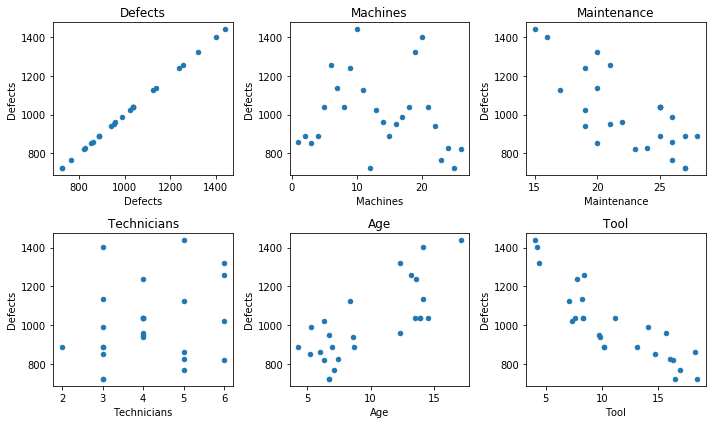

In [8]:
fig, ax_s = plt.subplots(2, 3, figsize=(10, 6))
i = 0
for column in df:
    df.plot(x=column, y='Defects', kind='scatter', ax=ax_s[i//3, i%3], title=column)
    i += 1
plt.tight_layout()
plt.show()

fig.savefig(f'figs/scatter.png', dpi=800) if savefigs else plt.show()

## Conclusions from initial scatter plots

The above scatter plots show that 'Defects' shows some significant correlation with the 'Maintenance', 'Age' and 'Tool' variables. Multiple linear regression is suitable method to build a statistical model to predict machine defects in this case, as it can be used to describe a multi-variate relationship with relative ease and effectiveness. If any individual relationships are non-linear, they can be transformed ahead of the linear regression calculation.

### Discussion of each scatter plot

*(reading from left-to-right, then top-to-bottom)*

1. **Defects:** Ignore, plot is simply a result of convenience for the loop.
2. **Machines:** The machine number is ***not correlated*** with the number of yearly defects. This is expected as machine number is an effectively random assignment and has no meaning other than being a unique identifier.
3. **Maintenance:** The number of maintenance operations performed is ***somewhat negatively correlated*** with the number of yearly defects. This makes sense as one would expect more frequently maintained machines to produce fewer defective parts. The scatter is quite loose, but the relationship appears to be slightly non-linear. 
4. **Technicians:** The number of technicians responsible for a machine appears to have ***no clear correlation*** with the number of yearly defects. It is possible on a larger sample set may show a stronger correlation, but this sample of 26 does not.
5. **Age:** The age of a machine is ***somewhat positively correlated*** with the number of yearly defects. This, again seems reasonable as one would expect older machines to perform more poorly.
6. **Tool:** The average number of tool changes per month performed by a machine is quite ***strongly negatively correlated*** with the number of yearly defects (Defects). This suggests that the longer a tool is in use, the more frequently it produces defective parts. This leads to the hypothesis that potentially an inverse relationship exists, supported by the fact that the correlation appears to potentially be non-linear (although difficult to tell given the small sample set). This relationship appears to be non-linear.


# 3. Test data transforms

As mentioned above, the scatter plots for 'Maintenance' and 'Tool' appear to perhaps be non-linear. Both look like they could be better fitted with a straight line if the x-axis was on a logarithmic scale, this results in the transformation:
$$y = a + ln(x)$$

where:
- $y$ is 'Defects'
- $x$ is the feature (i.e. 'Maintenance' or 'Tool'

**Reference:** Pennsylvania State University - https://online.stat.psu.edu/stat462/node/152/

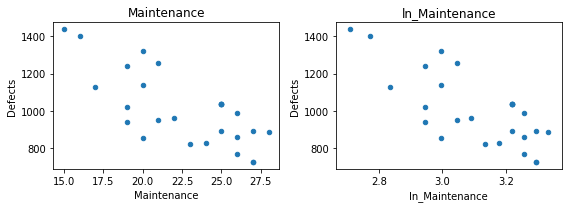

In [9]:
df['ln_Maintenance'] = np.log(df['Maintenance'])

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
df.plot(x='Maintenance', y='Defects', kind='scatter', ax=ax[0], title='Maintenance')
df.plot(x='ln_Maintenance', y='Defects', kind='scatter', ax=ax[1], title='ln_Maintenance')
plt.tight_layout()
plt.show()

fig.savefig(f'figs/scatter_transform_maintenance.png', dpi=800) if savefigs else plt.show()

The scatter plots above show that log transformation does not appear to have a significant impact on the linearity of the relationship between 'Maintenance' and 'Defects'.

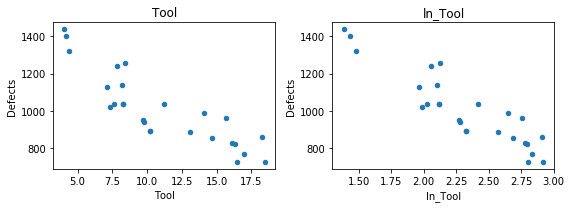

In [10]:
df['ln_Tool'] = np.log(df['Tool'])

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
df.plot(x='Tool', y='Defects', kind='scatter', ax=ax[0], title='Tool')
df.plot(x='ln_Tool', y='Defects', kind='scatter', ax=ax[1], title='ln_Tool')
plt.tight_layout()
plt.show()

fig.savefig(f'figs/scatter_transform_tool.png', dpi=800) if savefigs else plt.show()

The scatter plots above show that log transformation appears to result in a significantly more linear scatter plot of the relationship between 'Tool' and 'Defects'.

**Reorder columns to group features and transformations:**

In [11]:
df = df[['Defects', 
         'Tool', 'ln_Tool',
         'Age',
         'Maintenance', 'ln_Maintenance',
         'Technicians', 
         'Machines'
        ]]

# 4. Check Pearson Correlation Coefficients of all features 

Display table of all correlation coefficients:

In [12]:
df.corr()

,Defects,Tool,ln_Tool,Age,Maintenance,ln_Maintenance,Technicians,Machines
Defects,1.000000,-0.866531,-0.907643,0.759517,-0.735451,-0.746714,0.258720,-0.150556
Tool,-0.866531,1.000000,0.975437,-0.661026,0.654897,0.661534,-0.138259,0.138308
ln_Tool,-0.907643,0.975437,1.000000,-0.675831,0.701614,0.716981,-0.188828,0.093670
Age,0.759517,-0.661026,-0.675831,1.000000,-0.433960,-0.435968,0.127530,-0.042134
Maintenance,-0.735451,0.654897,0.701614,-0.433960,1.000000,0.996590,-0.344584,-0.020961
ln_Maintenance,-0.746714,0.661534,0.716981,-0.435968,0.996590,1.000000,-0.318973,-0.011323
Technicians,0.258720,-0.138259,-0.188828,0.127530,-0.344584,-0.318973,1.000000,0.226511
Machines,-0.150556,0.138308,0.093670,-0.042134,-0.020961,-0.011323,0.226511,1.000000


The table of all correlation coefficients can be more easily visualised with a coloured correlation matrix grid:

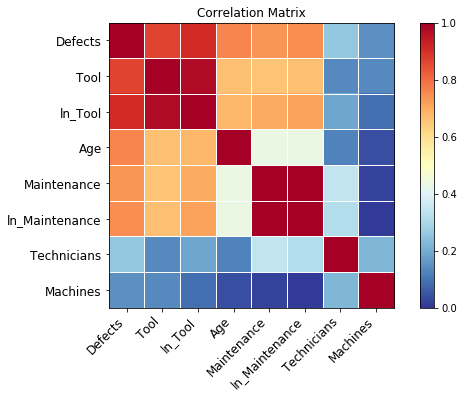

In [13]:
import statsmodels.graphics.api as smg

fig = smg.plot_corr(np.abs(df.corr()), xnames=df.columns, normcolor=(0,1))
fig.set_size_inches(8, 6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

fig.savefig(f'figs/correlation_matrix.png', dpi=800) if savefigs else plt.show()

## Conclusions drawn from correlation coefficients

### Potential multicolinearity
With correlation coefficients of 0.65-0.7, it is clear that 'Age' and 'Maintenance' (and it's transform) are both somewhat correlated with 'Tool' (and its transform). It is important to be mindful that these feature variables may not be entirely independent–the T-stat value of the features in the final model need to be statistically significant.

Of course, a feature and its transform cannot be included in the same model as they are highly colinear and directly dependent on each other.

### Features most fit for inclusion in the (multiple) linear regression model

| Feature | Correlation to Defects<br>& best transformation |
|:--|:--|
|Tool|Linear correlation good (-0.87)<br>Log transform substantially better (-0.91)|
|Age|Linear correlation good (0.76)|
|Maintenance|Linear correlation good (-0.74)<br>Log transform not substantially better (-0.75)|
|Technicians|not strongly correlated (0.26)|
|Machines|not strongly correlated (-0.15)|

The correlation coefficient for the log-transformed values for 'Tool' is substantially better than the linear relationship (from -0.87 to -0.91). Along with this, the scatter plot for the of Defects vs. log(Tool) appears much closer to a truly linear correlation. This leads to the conclusion that log-transforming the Tool variable is suitable and appropriate for improvement of fit.

Age is resonably linearly correlated with defects (0.76) and is suitable for use in the model.

Conversely to the 'Tool' case, the log transformation of 'Maintenance' does not substantially change the correlation coefficient or the scatter plot (from -0.74 to -0.75). This agrees with the earlier scatter plots and leads to the conclusion that it is probably best to keep the data in it's original form (i.e. un-transformed) to maintain data integrity and avoid erroneous manipulation.

'Technicians' are not sufficiently correlated with 'Defects' to warrant inclusion in a linear regression model, but will be checked as it is a true independent variable.

'Machines' is not a random variable without inherent meaning and should not be included in the model.

# 5. Create all (multiple) linear regression models to compare

The models to be compared follow a bottom-up development approach: adding features one at a time in order of decreasing values of correlation coefficient. 

**Model 0:**
Features: 'Tool'
This model is a simple linear regression model using only 'Tool' to predict 'Defects'. Note that the original (i.e. un-transformed) variable is used in this first model to provide a baseline upon which to build.

**Model 1:**
Features: 'ln_Tool'
This model is also a simple linear regression model but now uses the transformed value of 'Tool'—ln('Tool')—to predict 'Defects'. This transformation resulted in a higher correlation coefficient and will result in a better fitting model.

**Model 2:**
Features: 'ln_Tool', 'Age'
This model is a multiple  linear regression model building upon the previous. It adds the 'Age' feature, the feature with the next-highest correlation coefficient.

**Model 3:**
Features: 'ln_Tool', 'Age', 'Maintenance'
This model is, again, a multiple  linear regression model building upon the previous. It adds the 'Maintenance' feature, the feature with the next-highest correlation coefficient and the last independent feature with a reasonably high correlation coefficient.

**Model 4:**
Features: 'ln_Tool', 'Age', 'Maintenance', 'Technicians'
This final model a multiple  linear regression model that includes all independent features in the provided dataset. It adds the 'Technicians' feature, which is not well-correlated with 'Defects'.

In [14]:
models_features = [
    ['Tool'],
    ['ln_Tool'],
    ['ln_Tool', 'Age'],
    ['ln_Tool', 'Age', 'Maintenance'],
    ['ln_Tool', 'Age', 'Maintenance', 'Technicians'],
]
n_models = len(models_features)

## 5.a. Compute all models

In [15]:
import statsmodels.api as sm

In [16]:
y = {}
X = {}
mod = {}
res = {}
y_pred = {}
for (i, model_features) in enumerate(models_features):
    y[i] = df['Defects']
    X[i] = df[model_features]
    X[i].insert(0, 'Intercept', 1) # add intercept feature
    
    mod[i] = sm.OLS(y[i], X[i]) # Ordinary Least Squares linear regression
    res[i] = mod[i].fit()
    
    y_pred[i] = res[i].predict(X[i])

In [17]:
models_columns = [
    'features',
    'y', 
    'y_pred', 
    'X', 
    'model', 
    'results',
    'Adj R-squared',
    'Prob (F-statistic)',
    'MSE Model',
    'MSE Residuals',
    'RMSE Residuals',
    'MSE Total',
    'AIC',
    'BIC',
    'BSE',
    'HC0_se',
    'Condition Number',
]

models = pd.DataFrame(columns=models_columns)

for (i, model_features) in enumerate(models_features):
    y = df['Defects']
    X = df[model_features]
    X.insert(0, 'Intercept', 1) # add intercept feature
    
    model = sm.OLS(y, X) # Ordinary Least Squares linear regression
    results = model.fit()
    
    y_pred = results.predict(X)
    
    models.loc[f'Model {i}'] = {
        'features': model_features,
        'y': y,
        'y_pred': y_pred,
        'X': X,
        'model': model,
        'results': results,
        'Adj R-squared': results.rsquared_adj,
        'Prob (F-statistic)': results.f_pvalue,
        'MSE Model': results.mse_model,
        'MSE Residuals': results.mse_resid,
        'RMSE Residuals': np.sqrt(results.mse_resid),
        'MSE Total': results.mse_total,
        'AIC': results.aic,
        'BIC': results.bic,
        'BSE': results.bse,
        'HC0_se': results.HC0_se,
        'Condition Number': results.condition_number,
    }

## 5.b. Display dataframe of all calculated models

In [18]:
models.T

,Model 0,Model 1,Model 2,Model 3,Model 4
features,[Tool],[ln_Tool],"[ln_Tool, Age]","[ln_Tool, Age, Maintenance]","[ln_Tool, Age, Maintenance, Technicians]"
y,0 860 1 890 2 852 3 889 4 ...,0 860 1 890 2 852 3 889 4 ...,0 860 1 890 2 852 3 889 4 ...,0 860 1 890 2 852 3 889 4 ...,0 860 1 890 2 852 3 889 4 ...
y_pred,0 730.002509 1 1038.940918 2 867...,0 769.849544 1 1002.713230 2 857...,0 765.249973 1 965.413221 2 823...,0 766.010901 1 913.754101 2 876...,0 775.493340 1 901.258669 2 864...
X,Intercept Tool 0 1 18.3 1 ...,Intercept ln_Tool 0 1 2.90690...,Intercept ln_Tool Age 0 1 2...,Intercept ln_Tool Age Maintenance 0 ...,Intercept ln_Tool Age Maintenance Te...
model,<statsmodels.regression.linear_model.OLS objec...,<statsmodels.regression.linear_model.OLS objec...,<statsmodels.regression.linear_model.OLS objec...,<statsmodels.regression.linear_model.OLS objec...,<statsmodels.regression.linear_model.OLS objec...
results,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...
Adj R-squared,0.740495,0.816475,0.851205,0.871411,0.867615
Prob (F-statistic),1.04988e-08,1.57578e-10,1.17034e-10,1.42652e-10,9.96385e-10
MSE Model,731397,802445,420359,287945,216435
MSE Residuals,10110.9,7150.58,5797.39,5010.12,5158.02


# 6. Statistical performance metrics for models

## 6.a. Detailed metric tables for each model (similar to Excel's linear regression tool output)

In [19]:
from IPython.display import display
for i, model in models.iterrows():
    features = ", ".join(model.features)
    display(model['results'].summary(title=f'{i} ({features})'))
    print('='*80, end='\n\n')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                Model 0 (Tool)                                
==============================================================================
Dep. Variable:                Defects   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     72.34
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.05e-08
Time:                        18:10:29   Log-Likelihood:                -155.73
No. Observations:                  26   AIC:                             315.5
Df Residuals:                      24   BIC:                             318.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1427.9745     53.284     26.799      0.000    1318.001    1537.948
Tool         -38.1405      4.484     -8.505      0.000     -47.396     -28.885
==============================================================================
Omnibus:                        4.268   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                1.630
Skew:                           0.150   Prob(JB):                        0.443
Kurtosis:                       1.811   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Model 1 (ln_Tool)                               
==============================================================================
Dep. Variable:                Defects   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     112.2
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.58e-10
Time:                        18:10:29   Log-Likelihood:                -151.23
No. Observations:                  26   AIC:                             306.5
Df Residuals:                      24   BIC:                             309.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1927.9270     88.505     21.783      0.000    1745.262    2110.592
ln_Tool     -398.3890     37.607    -10.593      0.000    -476.006    -320.772
==============================================================================
Omnibus:                        1.884   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.390   Jarque-Bera (JB):                1.556
Skew:                           0.452   Prob(JB):                        0.459
Kurtosis:                       2.213   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Model 2 (ln_Tool, Age)                            
==============================================================================
Dep. Variable:                Defects   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     72.51
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.17e-10
Time:                        18:10:29   Log-Likelihood:                -147.95
No. Observations:                  26   AIC:                             301.9
Df Residuals:                      23   BIC:                             305.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1607.8290    147.888     10.872      0.000    1301.899    1913.759
ln_Tool     -318.6100     45.943     -6.935      0.000    -413.649    -223.571
Age           13.9315      5.422      2.569      0.017       2.715      25.148
==============================================================================
Omnibus:                        0.969   Durbin-Watson:                   2.538
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.965
Skew:                           0.350   Prob(JB):                        0.617
Kurtosis:                       2.368   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Model 3 (ln_Tool, Age, Maintenance)                      
==============================================================================
Dep. Variable:                Defects   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     57.47
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.43e-10
Time:                        18:10:29   Log-Likelihood:                -145.47
No. Observations:                  26   AIC:                             298.9
Df Residuals:                      22   BIC:                             304.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1692.9990    143.084     11.832      0.000    1396.261    1989.737
ln_Tool      -247.0720     54.159     -4.562      0.000    -359.391    -134.753
Age            14.7629      5.055      2.920      0.008       4.279      25.247
Maintenance   -11.4366      5.324     -2.148      0.043     -22.478      -0.395
==============================================================================
Omnibus:                        5.221   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                3.898
Skew:                           0.942   Prob(JB):                        0.142
Kurtosis:                       3.221   Cond. No.                         263.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
               Model 4 (ln_Tool, Age, Maintenance, Technicians)               
==============================================================================
Dep. Variable:                Defects   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     41.96
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           9.96e-10
Time:                        18:10:29   Log-Likelihood:                -145.24
No. Observations:                  26   AIC:                             300.5
Df Residuals:                      21   BIC:                             306.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1642.5419    167.253      9.821      0.000    1294.721    1990.363
ln_Tool      -249.7044     55.123     -4.530      0.000    -364.340    -135.069
Age            14.6871      5.131      2.863      0.009       4.017      25.357
Maintenance   -10.3892      5.671     -1.832      0.081     -22.182       1.403
Technicians     8.1627     13.434      0.608      0.550     -19.775      36.101
==============================================================================
Omnibus:                        5.484   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                4.044
Skew:                           0.954   Prob(JB):                        0.132
Kurtosis:                       3.307   Cond. No.                         304.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  6.b. T-stat metrics for all model features

In [20]:
tstats = {}
for i, model in models.iterrows():
    tstats[i] = model['results'].tvalues
df_tstats = pd.DataFrame(tstats)
df_tstats = df_tstats.replace(np.nan, '', regex=True)
df_tstats

,Model 0,Model 1,Model 2,Model 3,Model 4
Age,,,2.56942,2.92029,2.8625
Intercept,26.7991,21.7833,10.8719,11.8322,9.82072
Maintenance,,,,-2.14805,-1.83213
Technicians,,,,,0.607604
Tool,-8.50513,,,,
ln_Tool,,-10.5934,-6.93496,-4.56196,-4.52992


All features in model 0-3 have $|t\text{-}stat| > 2$. This means that all features are statistically significant in models 0-3 and the models are at least robust on these grounds.

In model 4, 'Maintenance' and 'Technicians' have $|t\text{-}stat| < 2$. This means that these features fail to reject the null hypothesis positing that their contribution to the model is not statistically significant. As a result this model is not valid due to its inclusion of statistically insignificant features.

## 6.c. Summary table to compare all models

In [21]:
from statsmodels.iolib.summary2 import summary_col, summary_params

summary = summary_col(
    results=models['results'].to_list(),
    model_names=models.index.to_list(),
    regressor_order=['Intercept'] + models_features[-1],
    stars=False, 
    float_format='%.5g', 
    info_dict={
        '----': lambda x: '----', # spacer row
        'Adjusted R2': lambda x: f'{x.rsquared_adj:.3f}',
        'p(F-stat)': lambda x: f'{x.f_pvalue:.2e}',
        'MSE Residuals': lambda x: f'{x.mse_resid:.0f}',
        'RMSE Residuals': lambda x: f'{np.sqrt(x.mse_resid):.1f}',
        'Condition No.': lambda x: f'{x.condition_number:.1f}',
    }
)

summary

,Model 0,Model 1,Model 2,Model 3,Model 4
Intercept,1428,1927.9,1607.8,1693,1642.5
,(53.284),(88.505),(147.89),(143.08),(167.25)
ln_Tool,,-398.39,-318.61,-247.07,-249.7
,,(37.607),(45.943),(54.159),(55.123)
Age,,,13.931,14.763,14.687
,,,(5.422),(5.0553),(5.1309)
Maintenance,,,,-11.437,-10.389
,,,,(5.3242),(5.6706)
Technicians,,,,,8.1627
,,,,,(13.434)


# 7. Choose final model and evaluate practical performance

First, a helper function to calculate the zscore for a given confidence interval:

In [22]:
from scipy.stats import norm
def zscore(p_confidence_interval):
    return norm.ppf(1-(1-p_confidence_interval)/2)
# test zscore function works correctly
print(f'{zscore(0.95):.2f}') # should be 1.96

1.96


Now, plot the models predicted results versus the datasets actual results:

In [23]:
model_name = 'Model 3'
model = models.loc[model_name]

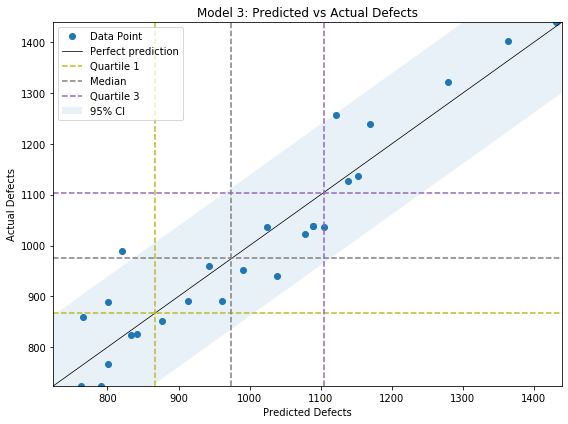

In [24]:
y = model['y']
y_pred = model['y_pred']

RMSE = model['RMSE Residuals']
SE_95 = zscore(0.95)*RMSE


fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(y_pred, y, 'o', label='Data Point')
ax.plot([min(y), max(y)], [min(y), max(y)], 'k', lw=0.75, label='Perfect prediction')

ax.fill_between(
    [min(y), max(y)],
    [min(y)-SE_95, max(y)-SE_95],
    [min(y)+SE_95, max(y)+SE_95],
    alpha=0.1,
    label='95% CI'
)

ax.set_title(f'{model_name}: Predicted vs Actual Defects')
ax.set_xlabel('Predicted Defects')
ax.set_ylabel('Actual Defects')

ax.set_xlim([min(y), max(y)])
ax.set_ylim([min(y), max(y)])


# quartile lines
ax.axhline(np.quantile(y, 0.25), c='C8', ls='--', label='Quartile 1')
ax.axhline(np.median(y), c='C7', ls='--', label='Median')
ax.axhline(np.quantile(y, 0.75), c='C4', ls='--', label='Quartile 3')
ax.axvline(np.quantile(y, 0.25), c='C8', ls='--')
ax.axvline(np.median(y), c='C7', ls='--')
ax.axvline(np.quantile(y, 0.75), c='C4', ls='--')

ax.legend()
plt.tight_layout()
plt.show()

fig.savefig(f'figs/final_model_pred_vs_act.png', dpi=800) if savefigs else plt.show()

The plot above shows that the model's achieved standard error (RMSE of residuals) results in a confidence interval that means the model predictions usefully predict the number of defects a machine will produce in a year roughly accurate to the quartile into which the number of defects will fall. 

# 8. Final model details

In [25]:
model['results'].summary(title='Final MLR model to predict machine defects')

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Final MLR model to predict machine defects                  
==============================================================================
Dep. Variable:                Defects   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     57.47
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.43e-10
Time:                        18:10:31   Log-Likelihood:                -145.47
No. Observations:                  26   AIC:                             298.9
Df Residuals:                      22   BIC:                             304.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1692.9990    143.084     11.832      0.000    1396.261    1989.737
ln_Tool      -247.0720     54.159     -4.562      0.000    -359.391    -134.753
Age            14.7629      5.055      2.920      0.008       4.279      25.247
Maintenance   -11.4366      5.324     -2.148      0.043     -22.478      -0.395
==============================================================================
Omnibus:                        5.221   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                3.898
Skew:                           0.942   Prob(JB):                        0.142
Kurtosis:                       3.221   Cond. No.                         263.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

.

.

.

.

.

# *A (Addendum): Some more detailed model metrics (not required reading)*

## A.1. Regression plots for each feature in each model

The primary conclusion from this section is that the scatter of all residual plots for all features in all models appears random, validating the feature's use in the model.

----- Model 0 -----


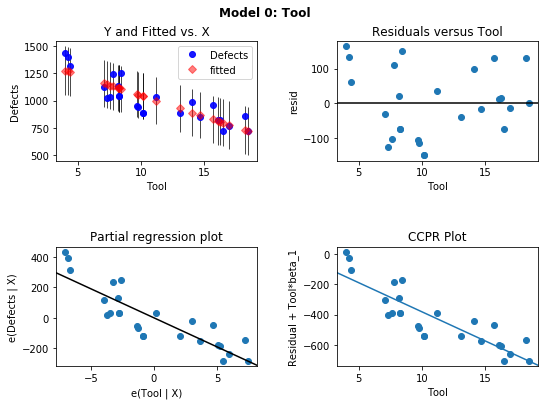


----- Model 1 -----


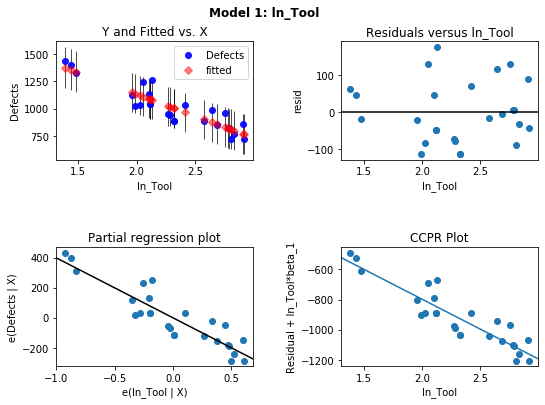


----- Model 2 -----


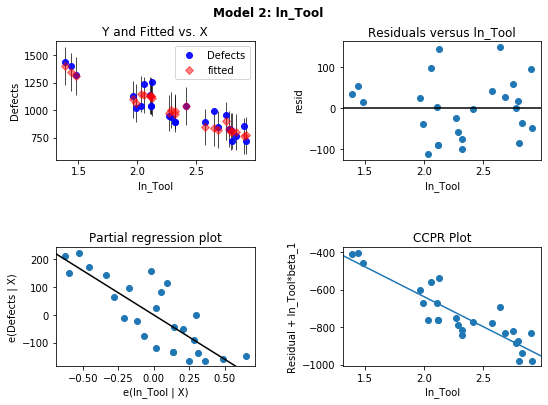

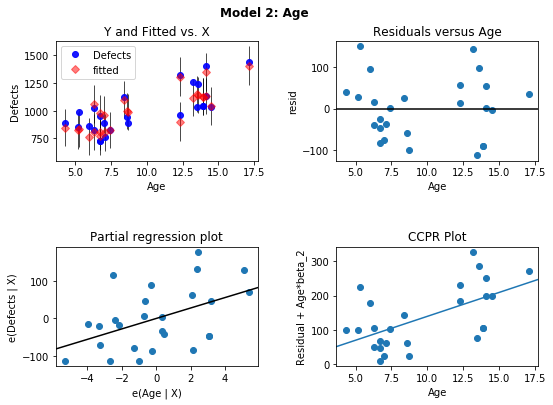


----- Model 3 -----


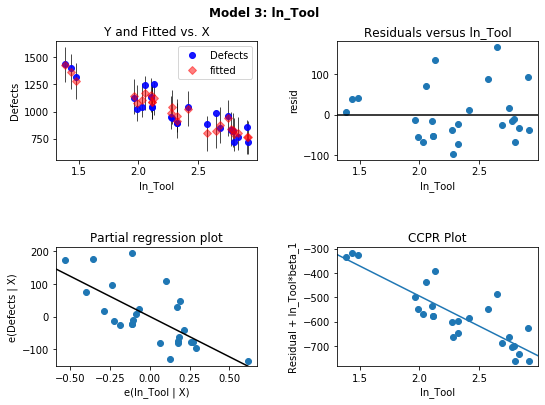

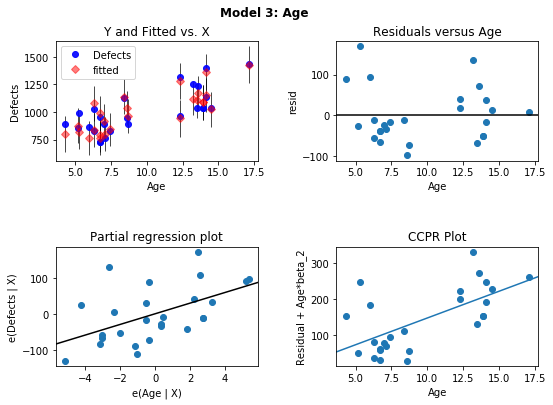

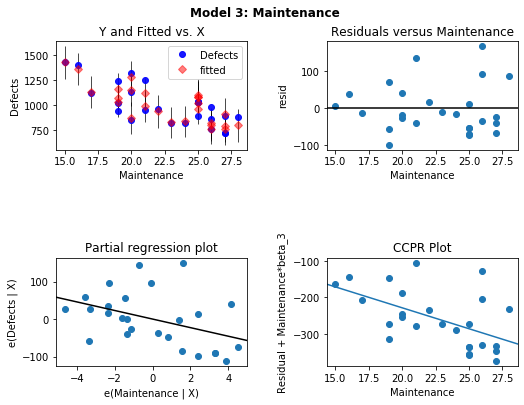


----- Model 4 -----


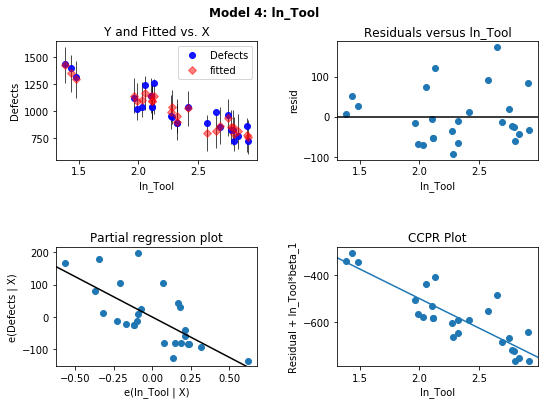

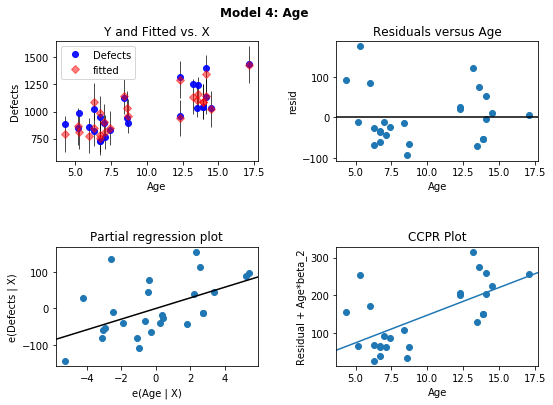

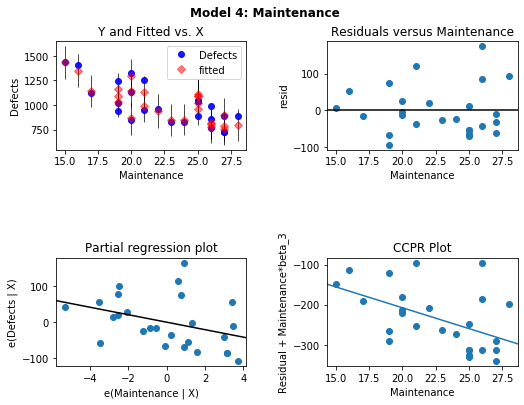

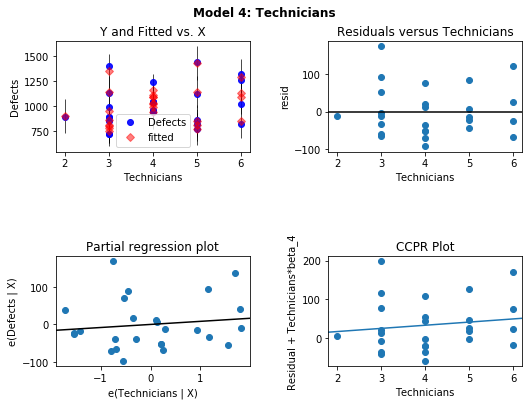

In [26]:
for i, row in models.iterrows():
    print(f'----- {i} -----')
    results = row['results']
    
    for feature in row['features']:
        fig = sm.graphics.plot_regress_exog(results, feature)
        fig.set_size_inches(8,6)
        fig.suptitle(f'{i}: {feature}', fontweight='bold')
        plt.show()
        print()
    print(80*'=')

## A.2. Influence plots for each model (relative influence of each data point on model parameters)

The primary conclusion from this section is that no single point has undue leverage on the parameterisation of the model: i.e. outliers (if any) are not skewing the model unreasonably.

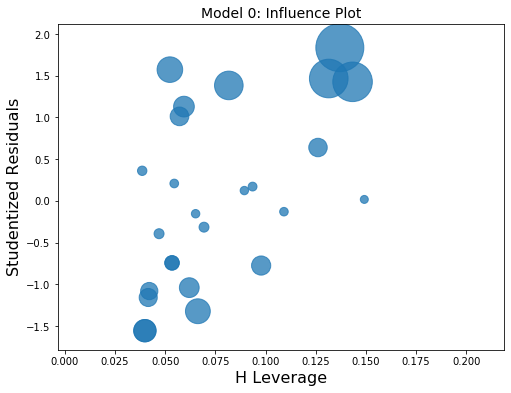

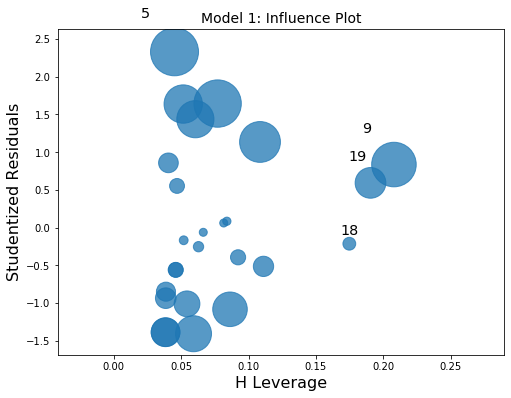

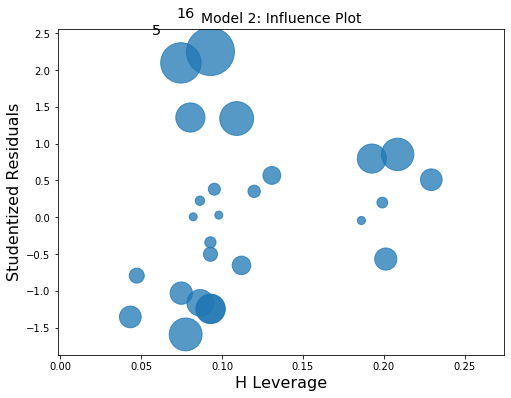

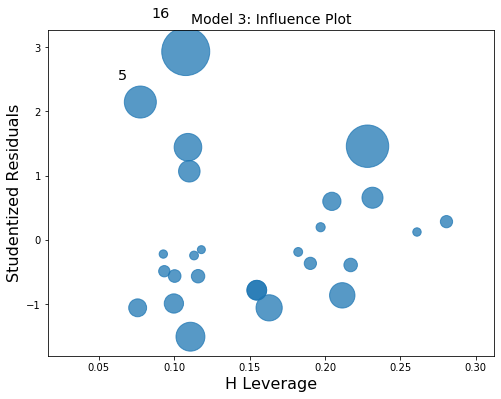

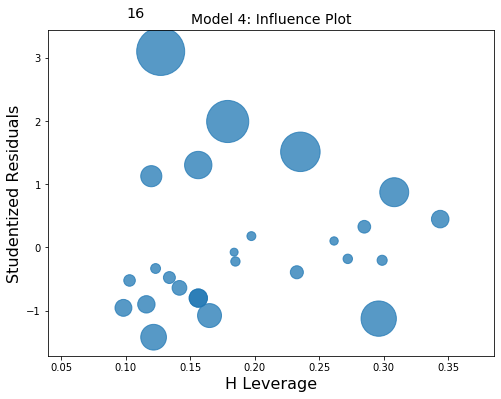

In [27]:
for i, row in models.iterrows():
    results = row['results']
    fig = sm.graphics.influence_plot(results, criterion="cooks")
    fig.set_size_inches(8,6)
    ax = plt.gca()
    ax.set_title(f'{i}: Influence Plot', fontsize='14')
    
    plt.show()
    print()

## A.3. Leverage plots for each model (relative leverage of each data point on model parameters)

These plots show that data points 5 and 16 (i.e. machines with ID no. 5 and 16) are outliers in the model, but they do not have dispriportionate leverage on the model's parameters. 

It is also worth noting that model 1 is highly influenced by data points 9, 18 and 19 (i.e. machines with ID no. 9, 18 and 19). This shows disproportionate reliance on a few data points and challenges the validity and robustness of model 1. However, model 1 was not chosen as the final model so this is not an issue.

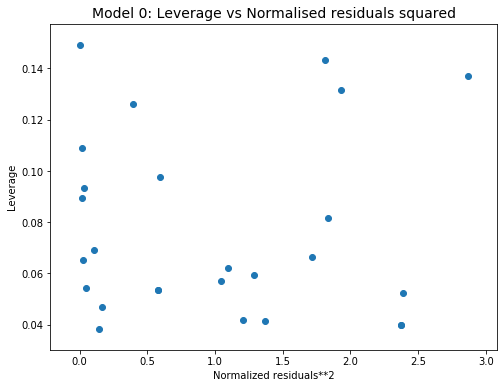

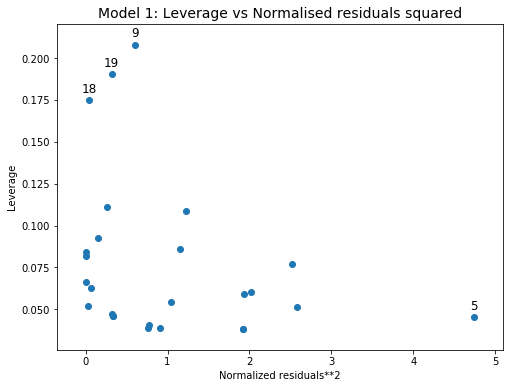

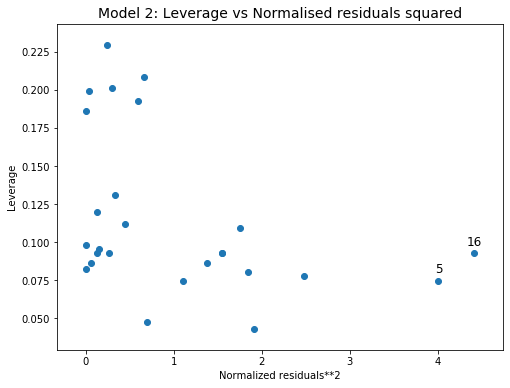

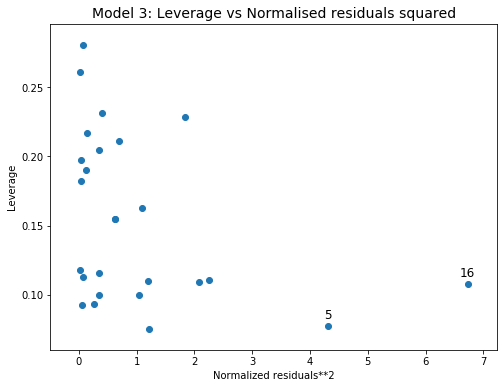

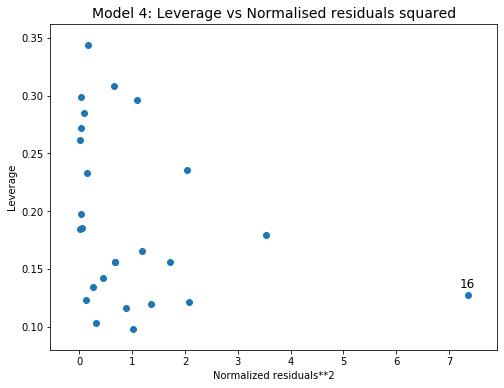

In [28]:
for i, row in models.iterrows():
    results = row['results']
    fig = sm.graphics.plot_leverage_resid2(results)
    
    fig.set_size_inches(8,6)
    ax = plt.gca()
    ax.set_title(f'{i}: Leverage vs Normalised residuals squared', fontsize='14')
    
    plt.show()
    print()